In [32]:
import os
from raphtory import Graph

# Specify the file path
binecode_path = "C:/ms_bincode/Graph_1"

# Load the file
if os.path.isfile(binecode_path):
    g1 = Graph.load_from_file(binecode_path)
    print(g1)
else:
    print(f"File does not exist: {binecode_path}")

In [1]:
import matplotlib.pyplot as plt
from raphtory import Graph

def plot_microservices_over_time(graphs):
    # Set the window sizes
    window_sizes = [30000, 60000, 600000, 3600000]

    # Labels for the legend
    window_labels = ['30 seconds', '1 minute', '10 minutes', '1 hour']

    # Initialise the plot with a set size
    plt.figure(figsize=(12,5))

    # Iterate over each window size
    for window_size, label in zip(window_sizes, window_labels):
        num_nodes = []
        time = []
        # Iterate over each graph in the list
        for g in graphs:
            for windowed_graph in g.rolling(window=window_size):
                result = windowed_graph.count_vertices()
                num_nodes.append(result)
                # Convert time to hours from milliseconds
                time.append(windowed_graph.earliest_time / 3600000)
        
        # Plot the data for the current window size with a unique label
        plt.plot(time, num_nodes, label=label)

    # Apply customizations
    plt.xlabel("Time (hours)")
    plt.ylabel("Number of microservices")
    plt.title("Amount of Alibaba's microservices over time")

    # Add the legend to the plot
    plt.legend()

    # Display the plot
    plt.show()

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from raphtory import algorithms as rp
from raphtory import Graph

# Set the window sizes
window_sizes = [30000, 60000, 600000, 3600000]

# Labels for the legend
window_labels = ['30 seconds', '1 minute', '10 minutes', '1 hour']

# Initialise the plot with a set size
plt.figure(figsize=(12,5))

# Iterate over each window size
for window_size, label in zip(window_sizes, window_labels):
    avg_degree = []
    time = []
    # Iterate over each graph in the list
    for g in graphs:
        for windowed_graph in g.rolling(window=window_size):
            result = windowed_graph.count_vertices()
            avg_degree.append(result)
            time.append(windowed_graph.earliest_time / 3600000)
    
    # Plot the data for the current window size with a unique label
    plt.plot(time, avg_degree, label=label)

# Apply customizations
plt.xlabel("Time (hours)")
plt.ylabel("Degree")
plt.title("Average degree over time")

# Add the legend to the plot
plt.legend()

# Display the plot
plt.show()

In [17]:
# Graph instances
graphs = [g1, g2, g3]

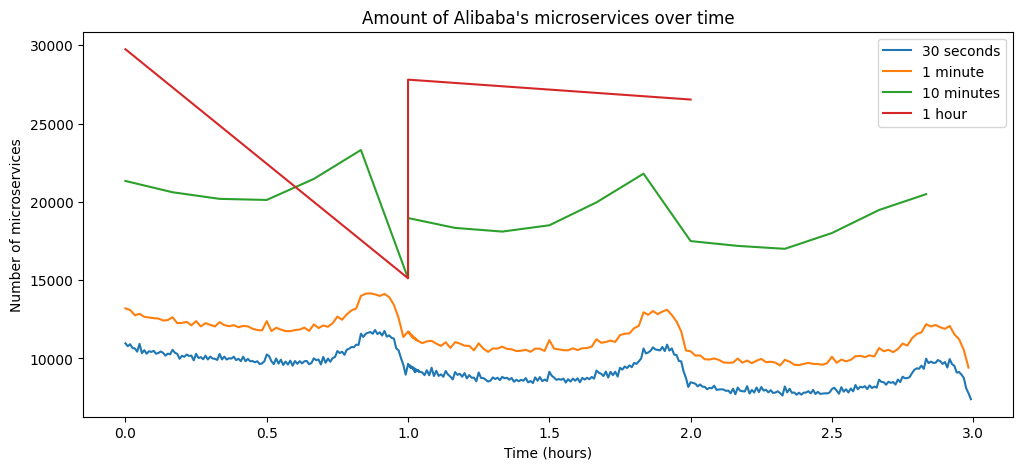

In [30]:
import matplotlib.pyplot as plt
import pandas as pd
from raphtory import algorithms as rp
from raphtory import Graph

# Set the window sizes
window_sizes = [30000, 60000, 600000, 3600000]

# Labels for the legend
window_labels = ['30 seconds', '1 minute', '10 minutes', '1 hour']

# Initialise the plot with a set size
plt.figure(figsize=(12,5))

# Iterate over each window size
for window_size, label in zip(window_sizes, window_labels):
    num_nodes = []
    time = []
    # Iterate over each graph in the list
    for g in graphs:
        for windowed_graph in g.rolling(window=window_size):
            result = windowed_graph.count_vertices()
            num_nodes.append(result)
            time.append(windowed_graph.earliest_time / 3600000)
    
    # Plot the data for the current window size with a unique label
    plt.plot(time, num_nodes, label=label)

# Apply customizations
plt.xlabel("Time (hours)")
plt.ylabel("Number of microservices")
plt.title("Amount of Alibaba's microservices over time")

# Add the legend to the plot
plt.legend()

# Display the plot
plt.show()